<a href="https://www.oguzerdogan.com/">
    <img src="https://www.oguzerdogan.com/wp-content/uploads/2020/10/logo_oz.png" width="200" align="right">
</a>

<center><h1><strong>A/B TEST & CONVERSION RATE PROJECT </strong></h1>
<img
src="https://www.oguzerdogan.com/wp-content/uploads/2020/11/a-b-testing.jpg">
</center>

# Analyze and Present A/B Test Results  

**This research was conducted in order to answer the questions asked for a job interview.**


Facebook recently introduced a new bidding type, **"average bidding”**, as an alternative to its exisiting bidding type, called **maximum bidding”**. 

One of our clients, **bombabomba.com**, has decided to test this new feature and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding.  

In this A/B test, bombabomba.com randomly splits its audience into two equally sized groups, e.g. the test and the control group. 

A Facebook ad campaign with “maximum bidding” is served to “control group” and another campaign with “average bidding” is served to the “test group”.  

The A/B test run for 1 month and bombabomba.com now expects you to analyze and present the results of this A/B test.


<div class="alert alert-block alert-info" style="margin-top: 20px">
<p><strong>You should answer the following questions in your presentation:</strong></p>
<ol>
<li>How would you define the hypothesis of this A/B test?</li>
<li>Can we conclude statistically significant results?</li>
<li>Which statistical test did you use, and why ?</li>
<li>Based on your answer to Question 2, what would be your recommendation to client?</li>

</ol>
</div>

# &#128217; Load Libraries

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #C20E69; font-family: 'Poppins'} 
h2, h3 {color: #25B89B; font-family: 'Poppins';}
h4 {color: #818286; font-family: 'Roboto';}
                                      
</style>

In [35]:
# Libraries

# Main
#----------------------
import pandas as pd
import numpy as np
from abtest import *

# Data Viz
#----------------------
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
plt.style.use('fivethirtyeight')

# Stats
#----------------------
from scipy import stats
from scipy.stats import skewtest
from scipy.stats import median_test
from scipy.stats import shapiro 
from statsmodels.stats.proportion import proportions_ztest 

# Settings
#----------------------
pd.set_option("display.max_columns",None);
pd.set_option("display.max_rows",None);


# &#128214; Read Data

In [36]:
control = pd.read_excel(r"C:\Users\oe\VBO\datasets\ab_testing_data.xlsx", sheet_name="Control Group")
test = pd.read_excel(r"C:\Users\oe\VBO\datasets\ab_testing_data.xlsx", sheet_name="Test Group")

## &#128270; Descriptive Statistics

In [37]:
def descriptive_statistics(dataframe):
    print("Data Descriptive Statistics","\n")
    name =[x for x in globals() if globals()[x] is dataframe][0]
    print("Dataframe: %s" % name,"\n")
    print("Data Shape: ",dataframe.shape,"\n")
    print(dataframe.info(),"\n")
    print("First 3 rows:","\n",dataframe.head(3),"\n")
    if dataframe.isna().any().sum() == 0:
        print("There are no missing value.")
    else:
        print(dataframe.isna().any().sum())
    print("_"*60)

In [38]:
for i in [control,test]:
    print()
    descriptive_statistics(i)


Data Descriptive Statistics 

Dataframe: control 

Data Shape:  (40, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB
None 

First 3 rows: 
      Impression        Click    Purchase      Earning
0  82529.459271  6090.077317  665.211255  2311.277143
1  98050.451926  3382.861786  315.084895  1742.806855
2  82696.023549  4167.965750  458.083738  1797.827447 

There are no missing value.
____________________________________________________________

Data Descriptive Statistics 

Dataframe: test 

Data Shape:  (40, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  

In this research,  there are two different groups and will investigate whether there is a statistically significant difference between the averages of these two different groups.

We have 40 observation and 4 feature in this dataset. 

Two different groups will be taken from the **"Purchase"** column for comparison.

Control group is standart bidding type " Maximum Bidding "

Test Group is new bidding type "Average Bidding "

In [39]:
control.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Impression,40.0,101711.449068,20302.157862,45475.942965,81711.120315,85726.690349,99790.701078,115212.816543,129438.442526,132950.532455,143105.791105,147539.336329
Click,40.0,5100.657373,1329.985498,2189.753157,3582.086578,4124.304129,5001.220602,5923.803596,7010.163109,7374.361202,7761.795112,7959.125069
Purchase,40.0,550.894059,134.108201,267.028943,381.992696,470.095533,531.206307,637.957088,740.182038,748.270761,790.187785,801.795020
Earning,40.0,1908.568300,302.917783,1253.989525,1569.055776,1685.847205,1975.160522,2119.802784,2254.805009,2318.528498,2481.308737,2497.295218


In [40]:
test.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Impression,40.0,120512.411758,18807.448712,79033.834921,97389.766706,112691.970770,119291.300775,132050.578933,141739.315249,153178.691063,158245.263797,158605.920483
Click,40.0,3967.549761,923.095073,1836.629861,2917.265312,3376.819024,3931.359804,4660.497911,5074.011379,5271.186906,6012.877296,6019.695079
Purchase,40.0,582.106097,161.152513,311.629515,381.054983,444.626828,551.355732,699.862360,823.745360,854.208945,876.576104,889.910460
Earning,40.0,2514.890733,282.730852,1939.611243,2186.392257,2280.537426,2544.666107,2761.545405,2813.610925,2931.311449,3091.940894,3171.489708


**Apparently, there are no outliers in these two group data, and the mean and median values are close to each other. However, box-plot graph will be applied to make sure.**

---
## &#9703; Separating Purchase columns from datasets

In [41]:
AB = pd.DataFrame()

AB["A"] = control["Purchase"]
AB["B"] = test["Purchase"]
AB.describe()

,A,B
count,40.000000,40.000000
mean,550.894059,582.106097
std,134.108201,161.152513
min,267.028943,311.629515
25%,470.095533,444.626828
50%,531.206307,551.355732
75%,637.957088,699.862360
max,801.795020,889.910460


In [42]:
AB.describe().T

,count,mean,std,min,25%,50%,75%,max
A,40.0,550.894059,134.108201,267.028943,470.095533,531.206307,637.957088,801.79502
B,40.0,582.106097,161.152513,311.629515,444.626828,551.355732,699.862360,889.91046


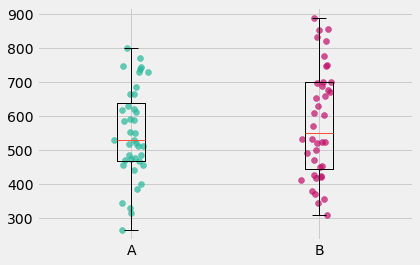

In [43]:
vals, names, xs = [],[],[]
for i, col in enumerate(AB.columns):
    vals.append(AB[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, AB[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
    
plt.boxplot(vals, labels=names)
palette = ['#25B89B', '#C20E69']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.7, color=c)
plt.show()

A is control group -- Maximum Bidding  
B is test group -- Avarage Bidding

When we looking at the averages of these two groups, the test group "average bidding", looks better.

However, this is only a mathematical inference and **no business decision shouldn't be made based on this result.** 

Whether the result is random or not should be statistically investigated.

The main question is;

**Is there a statistically significant difference between these two average of groups?**

# &#128270;Two Independent Sample T Test

**Assumptions:**

1. Normality Assumption  
    - This situation will be observed first with qqplot, then final decision will be reached with shapiro-wilks test and skewtest
2. Homogeneity of variance
    - Levene test 

## Q - Q Plot

### Control Group - Maximum Bidding

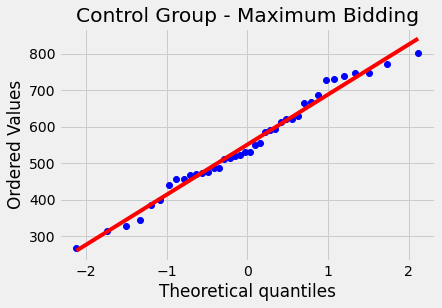

In [44]:
stats.probplot(AB["A"], dist="norm", plot=pylab)
pylab.title("Control Group - Maximum Bidding")
pylab.show()

The distribution seems normal, however the shapiro-wilk test will be applied to be sure.

### Test Group - Average Bidding

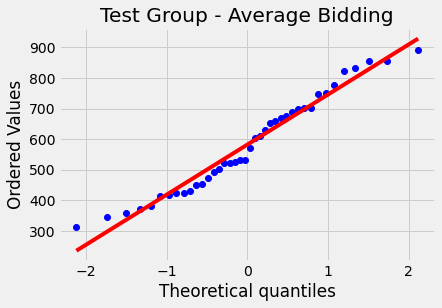

In [45]:
stats.probplot(AB["B"], dist="norm", plot=pylab)
pylab.title("Test Group - Average Bidding")
pylab.show()

## 1. Normality Assumption

### Shapiro - Wilk Test

➠ Ho: The data follows a normal distribution.

➠ H1: The data does not follow a normal distribution.

## 2. Variance Homogenity Assumption

### Levene Test

➠ Ho: There is no difference between the variance of the both groups.  
➠ H1: There is a significant difference between the variance of the both groups.

## Two Independent Sample T Test Hypothesis

➠ Ho: There is not a statistically significant difference between the means with  
➠ H1: There is a statistically significant difference between the means with

## Other Situations

#### At least one group does not follow a normal distribution
- In this case the non parametric test "Mann Whitney - U test" is applied.

#### Groups follow a normal distribution but variances are NOT homogenous
- In this case <b>"Welch Test"</b> is applied.   
- For this option in <b>Two Independent Sample T Test Function</b> `equal_var` = `True` argument is applied.

---
# &#128202; TEST ANALYSIS REPORT

⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝⁝
                          ▚ • AB Test Function Analysis Reports • ▚                 
---------------------------------------------------------------------------------------------------- 

Normality Assumption
➠ Ho: The data follows a normal distribution.
➠ H1: The data does not follow a normal distribution.
---------------------------------------------------------------------------------------------------- 

▚ Normality Assumption Report 

A : assumption of normality is provided ✓. | p-value: 0.5891 | Null hypothesis is not rejected.
B : assumption of normality is provided ✓. | p-value: 0.1541 | Null hypothesis is not rejected.
----------------------------------------------------------------------------------------------------
Assumption of normality is provided! ✓✓ Levene Test is loading

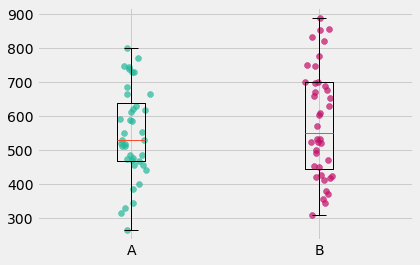

In [46]:
test_ab(AB,"A", "B", alpha = 0.05, plot=True)

# 🗒 Result

<div class="alert alert-block alert-info" style="margin-top: 20px">
<p>&nbsp;</p>
<p>As a result of the statistical tests applied to the data obtained by the two groups in the research, the groups <b>provided</b> all the necessary statistical assumptions in the literature. </p>
<p>In this direction, it was <b>proved</b> statistically and scientifically that there was <b>no significant difference</b> between the <b>averages</b> of the two groups with <b>95% confidence.</b></p>
<p><b>In line with these results, there is not statistically significant difference between purchase of the control group (Max Bidding) and purchase of the test group (Average Bidding)</b></p>
<p>&nbsp;</p>
</div>

---
# Website Click Through Rate Analysis (CTR)

- It is a rate that shows how often users who saw the ad CLICKED the ad.  
- Ad Clicks / Ad Shows

In [76]:
control_CTR=control["Click"].sum()/control["Impression"].sum()
test_CTR= test["Click"].sum() / test["Impression"].sum()

print(control_CTR)
print(test_CTR)

0.05014831092596444
0.032922333085396625


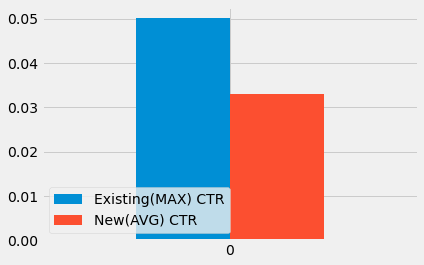

In [70]:
df_CTR = pd.DataFrame({"Existing(MAX) CTR":[control_CTR], "New(AVG) CTR": [test_CTR]})
df_CTR.plot.bar(rot=0).legend(loc=3) ;

**Hypothesis**  
➠Ho: The experiment has no effect on user behavior. (p_cont = p_test)  
➠H1: The experiment has an effect on user behavior. (p_cont ≠ p_test)

In [49]:
clicks= np.array([control["Click"].sum(),test["Click"].sum()])
shows= np.array([control["Impression"].sum(), test["Impression"].sum()])
proportions_ztest(count=clicks, nobs=shows)

(129.3304801715903, 0.0)

# 🗒 Result of CTR

<div class="alert alert-block alert-info" style="margin-top: 20px">
<p>p - value &lt; 0.05 ➠ <strong>Reject Ho hypthesis. ( The experiment has no effect on user behavior. ) </strong></p>
<p>When the bidding methods are examined, the effect of these methods on user behavior <strong>(clicks)</strong> is <strong>different.</strong> </p>
<p>And this difference is in favor of the current <strong>&quot;max bidding&quot;</strong> method.</p>
</div>

---
# Conversion Rate

<p>Conversion rate is calculated by dividing the <strong>number of conversions</strong> by the <strong>total number of visitors.</strong> </p>
<p>For example, if an ecommerce site gets 200 visitors a month and has 50 sales, the conversion rate would equal <strong>25%</strong>.</p>

In [64]:
control_CR = control["Purchase"].sum()/control["Impression"].sum()
test_CR = test["Purchase"].sum() / test["Impression"].sum()

print("Max Bidding CR:", round(control_CR,4))
print("AVG Bidding CR:", round(test_CR,4))

Max Bidding CR: 0.0054
AVG Bidding CR: 0.0048


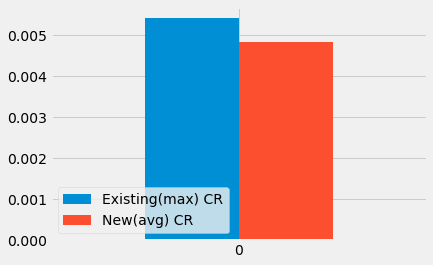

In [69]:
df_CR=pd.DataFrame({"Existing(max) CR":[control_CR], "New(avg) CR": [test_CR]})
df_CR.plot.bar(rot=0).legend(loc=3) ;

**Hypothesis**  
➠Ho: The experiment has no effect on user behavior. (p_cont = p_test)  
➠H1: The experiment has an effect on user behavior. (p_cont ≠ p_test)

In [71]:
purchase= np.array([control["Purchase"].sum(),test["Purchase"].sum()])
impression= np.array([control["Impression"].sum(), test["Impression"].sum()])
proportions_ztest(count=purchase, nobs=impression)

(12.221173465876399, 2.39600929947382e-34)

# 🗒 Result of Conversion Rate

<div class="alert alert-block alert-info" style="margin-top: 20px">
<p>p - value &lt; 0.05 ➠ <strong>Reject Ho hypthesis. ( The experiment has no effect on user behavior. ) </strong></p>
<p>When the bidding methods are examined, the effect of these methods on user behavior <strong>(Purchasing)</strong> is <strong>different.</strong> </p>
<p>And this difference is in favor of the current <strong>&quot;max bidding&quot;</strong> method.</p>
</div>

---
# 📑 MAIN RESULTS

<div class="alert alert-warning" role="alert" style="margin-top: 20px">
<ul>
<li>Control and test group data were analyzed.</li>
<li>No NA value was observed in both groups.</li>
<li>When looked with the boxplot method, it was observed that there was no outlier in both groups.</li>
<li>Testing was done between these two groups. Control group using the max bidding method as called A Test group using the new method, average bidding as called B</li>
<li>Two independent samples t test was deemed appropriate for this comparison.</li>
<li>For two independent samples t test; variance homogeneity and normality assumption were provided.</li>

</ul>
<hr />
<p><strong>Is the new system advantageous?</strong></p>
<p>As a result of the statistical tests applied to the data obtained by the two groups in the research, the groups <strong>provided</strong> all the necessary statistical assumptions in the literature.</p>
<p>In this direction, it was <strong>proved</strong> statistically and scientifically that there was <strong>no significant difference</strong> between the <strong>averages</strong> of the two groups with <strong>95% confidence.</strong></p>
<p>In line with these results, <strong>there is not statistically significant difference</strong> between purchase of the control group (Max Bidding) and purchase of the test group (Average Bidding)</p>
<p><strong>The new method does not benefit your agency in terms of purchasing</strong></p>
<hr />
<p><strong>Did the user who saw the ad click on the ad in the new system?</strong></p>
<p>There is a difference in <strong>Clicking</strong> between the two methods, but this is in favor of <strong>&quot;Maximum Bidding&quot;</strong>, which is the system your agency <strong>currently use.</strong></p>
<hr />
<p><strong>Did visitors buy the product in the new system?</strong></p>
<p>There is a difference in <strong>Purchasing</strong> between the two methods, but this is in favor of <strong>&quot;Maximum Bidding&quot;</strong>, which is the system your agency <strong>currently use.</strong></p>
<p>&nbsp;</p>
</div>

# &#128477; Action Suggestions by Our Company

<div class="alert alert-success" role="alert">
<p>As a result of the statistical tests carried out, the new system &quot;Average Bidding&quot; has not been observed to benefit your company.</p>
<p>Some advice for action:</p>
<p><strong>We recommend that you continue with the existing system.</strong></p>
<ul>
<li>A new test can be done by increasing the number of samples.</li>